In [16]:
!pip install ansys-mapdl-core==0.68.4
!pip install trame
!pip install vtk
!pip install imageio
!pip install numpy
!pip install "pyvista[jupyter]"
!pip install trame-vtk
!pip install trame-vuetify

In [1]:
import os
from dotenv import load_dotenv

load_dotenv()

MAPDL_RUN_LOCATION = os.getenv('MAPDL_RUN_LOCATION')
MAPDL_START_TIMEOUT = int(os.getenv('MAPDL_START_TIMEOUT', 30))

print(MAPDL_RUN_LOCATION)

D:/constructal_automate_analysis_files


In [1]:
from ansys.mapdl.core import launch_mapdl

mapdl = launch_mapdl()

print(mapdl)

Product:             Ansys Mechanical Enterprise Academic Student
MAPDL Version:       24.2
ansys.mapdl Version: 0.68.4



In [3]:
#mapdl.finish()
mapdl.cwd('D:/constructal_automate_analysis_files/case-study-lancanova-2024/phi_0.30_L_3_T_4_k_4.00_SP_1958')
#D:\constructal_automate_analysis_files\case-study-lancanova-2024\phi_0.30_L_3_T_4_k_4.00_SP_1958
file_name = 'phi_0.30_L_3_T_4_k_4.00_SP_1958'
mapdl.filname(fname=file_name, key=0)
mapdl.resume(fname=file_name, ext = 'db')

RESUME ANSYS DATA FROM FILE NAME=phi_0.30_L_3_T_4_k_4.00_SP_1958.db                                                                                                                                                                                                                                  

 *** MAPDL GLOBAL STATUS *** 

 TITLE = phi_0.30_L_3_T_4_k_4.00_SP_1958                                       
 ANALYSIS TYPE =  STATIC (STEADY-STATE)
        56 KEYPOINTS DEFINED     MAX KEYPOINT NUMBER =             56
       106 LINES DEFINED         MAX LINE NUMBER =                124
        51 AREAS DEFINED         MAX AREA NUMBER =                 59
         1 ELEM TYPES DEFINED    MAX ELEM TYPE NUMBER =             1
      4400 ELEMENTS DEFINED      MAX ELEMENT NUMBER =            4400
     13411 NODES DEFINED         MAX NODE NUMBER =              13411
         1 MATERIALS DEFINED     MAX MATERIAL NUMBER =              1
         0 REAL CONSTS DEFINED   MAX REAL CONST NUMBER =        

In [5]:
mapdl.post1()
mapdl.set(lstep=1, sbstep=48)

USE LOAD STEP     1  SUBSTEP    48  FOR LOAD CASE 0 

 SET COMMAND GOT LOAD STEP=     1  SUBSTEP=    48  CUMULATIVE ITERATION=   121
   TIME/FREQUENCY=  2296.1    
 TITLE= phi_0.30_L_3_T_4_k_4.00_SP_1958

In [17]:
mapdl.result.plot_principal_nodal_stress(
    47,
    "SEQV",
    lighting=False,
    cpos="iso",
    background="white",
    text_color="black",
    add_text=False,
    show_edges=True,         
    edge_color="black",       
    cmap="jet",               
    rng=[0, 355],      
    line_width=1.0,
    show_displacement=True, displacement_factor=2,
    #show=True,
    # screenshot='teste.png'
    show_scalar_bar=True,     # Display the scalar bar
    scalar_bar_args={
        "title": "Tensões (MPa)",
        "fmt":"%10.2f",
        "width": 0.4,
        "position_x": 0.55,
        "position_y": 0.08,
        "title_font_size": 20,
        "label_font_size": 16,
    },
    
    
)

Widget(value='<iframe src="http://localhost:59831/index.html?ui=P_0x27083807290_7&reconnect=auto" class="pyvis…

D:\constructal_automate_post_processing\constructal-automate-pp-venv\Lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (D:\constructal_automate_post_processing\constructal-automate-pp-venv\Lib\site-packages\trame\widgets\__init__.py)

Falling back to a static output.
  warnings.warn(


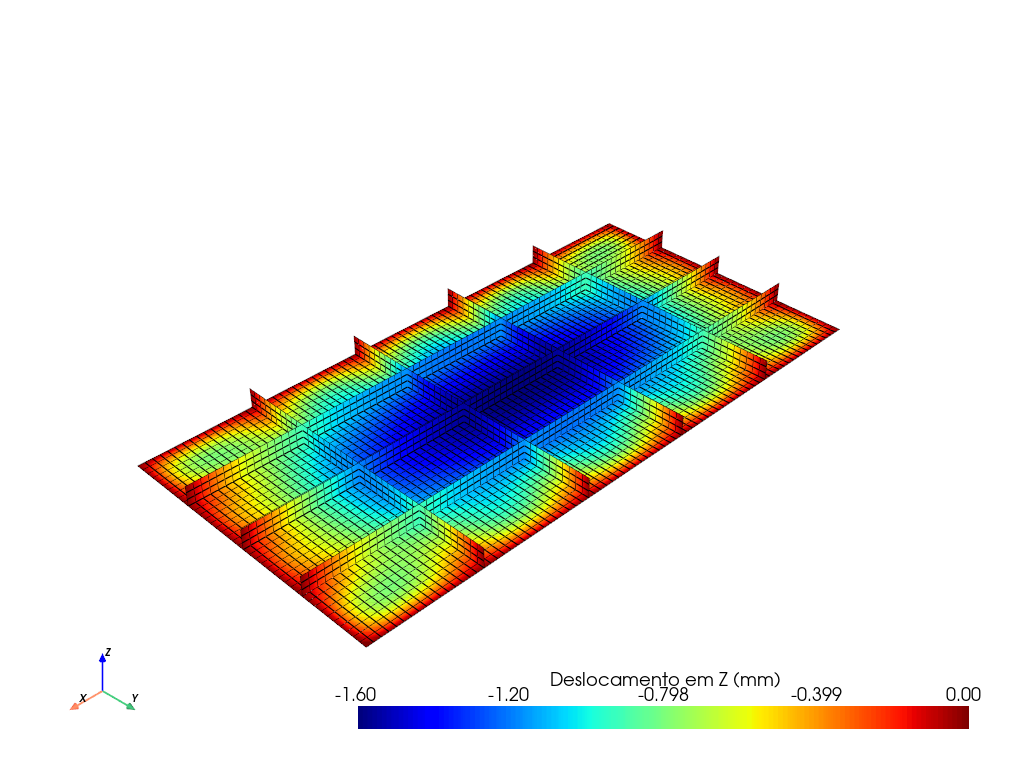

In [14]:
# Include annotations in the plot
mapdl.result.plot_nodal_displacement(
    28,
    "UZ",
    lighting=False,
    cpos="iso",
    background="white",
    text_color="black",
    add_text=False,
    show_edges=True,          # Show edges in the plot
    edge_color="black",       # Set edge color    
    cmap="jet",
    show_displacement=True, displacement_factor=2,
    show_scalar_bar=True,
    scalar_bar_args={
        "title": "Deslocamento em Z (mm)",
    },
)

In [22]:
mapdl.exit()